In [35]:
import pandas as pd
import numpy as np

from sklearn.ensemble import *
from sklearn.tree import *

from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *

import seaborn as sns
import matplotlib.pyplot as plt

from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.mcd import MCD
from pyod.models.hbos import HBOS

%matplotlib inline

In [36]:
df = pd.read_csv('creditcard.csv')

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df = df.drop('Time', axis=1)

In [39]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1),
                                                   df['Class'],
                                                   test_size=0.3,
                                                   random_state=42)

In [42]:
X_train['org_class'] = y_train.values
X_test['org_class'] = y_test.values

# Outlier separation

In [43]:
from pyod.models.sod import SOD
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.lmdd import LMDD
from pyod.models.cof import COF

In [44]:
y_train.value_counts() / y_train.shape[0]

0    0.998214
1    0.001786
Name: Class, dtype: float64

In [45]:
y_train.shape

(199364,)

In [46]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [47]:
# out = KNN(contamination=0.002, n_jobs=-1)
out = HBOS(contamination=0.002, n_bins=2)
# out = COF(contamination=0.005)

In [48]:
out.fit(X_train.drop('org_class', axis=1))

HBOS(alpha=0.1, contamination=0.002, n_bins=2, tol=0.5)

In [49]:
eyeball_outlier_scores = pd.DataFrame(y_train.values, columns=['class'])
eyeball_outlier_scores['decision_score'] = out.decision_scores_
eyeball_outlier_scores['outlier_pred'] = out.labels_

In [50]:
eyeball_outlier_scores['decision_score'].describe()

count    199364.000000
mean         76.197664
std           0.827512
min          75.430739
25%          75.430739
50%          76.076128
75%          76.701865
max          89.208078
Name: decision_score, dtype: float64

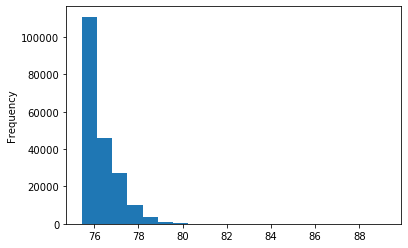

In [51]:
# eyeball_outlier_scores[eyeball_outlier_scores['decision_score'] < 30]['decision_score'].plot.hist(bins=20)
eyeball_outlier_scores['decision_score'].plot.hist(bins=20)

In [52]:
np.quantile(eyeball_outlier_scores['decision_score'], 0.999)

80.9953716953349

In [53]:
# decision_score_threshold = 76   w/ 0.002 5bins
decision_score_threshold = 81

eyeball_outlier_scores['thresh_pred'] = eyeball_outlier_scores['decision_score'] > decision_score_threshold
eyeball_outlier_scores['thresh_pred'] = eyeball_outlier_scores['thresh_pred'].astype(int)

In [54]:
eyeball_outlier_scores.groupby(['class','thresh_pred'])['decision_score'].count().reset_index().round(4)

,class,thresh_pred,decision_score
0,0,0,198936
1,0,1,72
2,1,0,228
3,1,1,128


In [55]:
eyeball_outlier_scores.groupby(['class','outlier_pred'])['decision_score'].count().reset_index().round(4)

,class,outlier_pred,decision_score
0,0,0,198801
1,0,1,207
2,1,0,196
3,1,1,160


In [56]:
eyeball_outlier_scores.groupby(['class','thresh_pred'])['decision_score'].mean().reset_index().round(4)

,class,thresh_pred,decision_score
0,0,0,76.1892
1,0,1,82.5394
2,1,0,77.9497
3,1,1,82.6433


In [57]:
print(classification_report(eyeball_outlier_scores['class'],
                            eyeball_outlier_scores['thresh_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.64      0.36      0.46       356

    accuracy                           1.00    199364
   macro avg       0.82      0.68      0.73    199364
weighted avg       1.00      1.00      1.00    199364



In [58]:
eyeball_outlier_scores.groupby(['class','outlier_pred'])['decision_score'].count().reset_index().round(4)

,class,outlier_pred,decision_score
0,0,0,198801
1,0,1,207
2,1,0,196
3,1,1,160


In [59]:
print(classification_report(eyeball_outlier_scores['class'],
                            eyeball_outlier_scores['thresh_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.64      0.36      0.46       356

    accuracy                           1.00    199364
   macro avg       0.82      0.68      0.73    199364
weighted avg       1.00      1.00      1.00    199364



In [60]:
print(classification_report(eyeball_outlier_scores['class'],
                            eyeball_outlier_scores['outlier_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.44      0.45      0.44       356

    accuracy                           1.00    199364
   macro avg       0.72      0.72      0.72    199364
weighted avg       1.00      1.00      1.00    199364



# Recombine with Outlier Separation

In [61]:
#Outlier Exclusion is set to 0 if the outlier compose base "norm" set, 1 if they are in "adversarial" set
outlier_exclusion = 0

In [62]:
if outlier_exclusion == 1:
#     outlier_mask = out.labels_ == 0
    outlier_mask = out.decision_scores_ < decision_score_threshold

else:
    outlier_mask = out.decision_scores_ > decision_score_threshold

In [70]:
outlier_values = out.decision_scores_ > decision_score_threshold
outlier_values = outlier_values.astype(int)

In [71]:
outlier_mask.sum()

200

In [72]:
outlier_values.shape

(199364,)

In [64]:
norm_train = X_train.loc[outlier_mask].copy()
norm_train['class'] = 1 - outlier_exclusion
all_train = X_train.copy()
all_train['class'] = 0 + outlier_exclusion

train_df = pd.concat([norm_train, all_train], axis=0)

In [65]:
train_df['class'].value_counts()

0    199364
1       200
Name: class, dtype: int64

In [66]:
norm_test = X_test[X_test['org_class'] == 0].copy()
norm_test['class'] = 0
all_test = X_test.copy()
all_test['class'] = 1

# test_df = pd.concat([norm_test, all_test], axis=0)

In [67]:
train_df.shape

(199564, 31)

In [68]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,org_class
2557,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,...,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00,0
247823,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,...,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28,0
152342,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,...,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00,0
103385,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,...,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98,0
8771,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,...,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31,0


In [69]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
# clf = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
traditional = RandomForestClassifier(n_estimators=25, random_state=42, n_jobs=-1)

# clf = DecisionTreeClassifier(random_state=42)

In [73]:
clf.fit(train_df.drop(['org_class','class'], axis=1), train_df['class'])
traditional.fit(X_train.drop('org_class', axis=1), outlier_values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
pred_train = clf.predict(train_df.drop(['org_class','class'], axis=1))
pred_proba_train = clf.predict_proba(train_df.drop(['org_class','class'], axis=1))

pred_test = clf.predict(X_test.drop('org_class', axis=1))
pred_proba_test = clf.predict_proba(X_test.drop('org_class', axis=1))

In [75]:
pred_train_trad = traditional.predict(X_train.drop('org_class', axis=1))
pred_proba_train_trad = traditional.predict_proba(X_train.drop('org_class', axis=1))

pred_test_trad = traditional.predict(X_test.drop('org_class', axis=1))
pred_proba_test_trad = traditional.predict_proba(X_test.drop('org_class', axis=1))

In [76]:
train_analysis = pd.DataFrame(pred_proba_train)
train_analysis['org_class'] = train_df['org_class'].values
train_analysis['class'] = train_df['class'].values

In [77]:
train_analysis.groupby(['org_class','class'])[[0,1]].mean()

0         1
org_class class                    
0         0      0.999797  0.000203
          1      0.519624  0.480376
1         0      0.805359  0.194641
          1      0.487227  0.512773

In [81]:
train_analysis_trad = pd.DataFrame(pred_proba_train_trad)
train_analysis_trad['org_class'] = X_train['org_class'].values
train_analysis_trad['class'] = outlier_values

In [82]:
train_analysis_trad.groupby(['org_class','class'])[[0,1]].mean()

0         1
org_class class                    
0         0      0.999946  0.000054
          1      0.133889  0.866111
1         0      0.971579  0.028421
          1      0.046875  0.953125

In [87]:
test_analysis_trad = pd.DataFrame(pred_proba_test_trad)
test_analysis_trad['org_class'] = X_test['org_class'].values

In [89]:
test_analysis_trad.groupby('org_class')[0,1].mean()

<ipython-input-89-0c1d55d547f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_analysis_trad.groupby('org_class')[0,1].mean()


,0,1
org_class,,
0,0.999683,0.000317
1,0.645882,0.354118


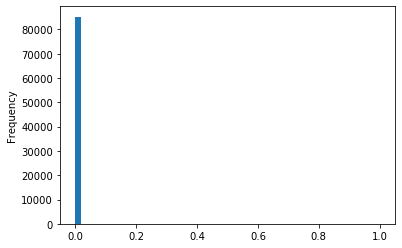

In [97]:
test_analysis_trad[1].plot.hist(bins=50)

In [98]:
test_analysis = pd.DataFrame(pred_proba_test)
test_analysis['org_class'] = y_test.values
# test_analysis['class'] = test_df['class'].values

In [99]:
test_analysis.groupby(['org_class'])[[0,1]].mean()

,0,1
org_class,,
0,0.999817,0.000183
1,0.806219,0.193781


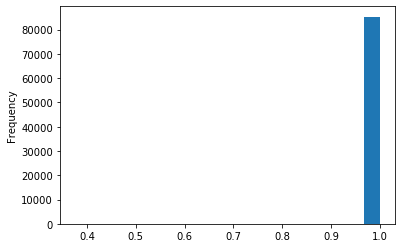

In [100]:
test_analysis[outlier_exclusion].plot.hist(bins=20)

test_analysis['thresh_pred'] = test_analysis[0] < .51
test_analysis['thresh_pred'] = test_analysis['thresh_pred'].astype(int)

test_analysis['thresh_pred'].value_counts()

test_analysis.groupby(['org_class','thresh_pred'])[[0,1]].mean()

print(classification_report(test_analysis['org_class'], 
                            test_analysis['thresh_pred']))

In [101]:
outlier_pred = out.predict(X_test.drop(['org_class'], axis=1))
test_analysis['outlier_pred'] = outlier_pred

In [102]:
print(classification_report(test_analysis['org_class'], 
                            test_analysis['outlier_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.42      0.43      0.42       136

    accuracy                           1.00     85443
   macro avg       0.71      0.71      0.71     85443
weighted avg       1.00      1.00      1.00     85443



#### Traditional Comparision

In [108]:
train_analysis_trad = pd.DataFrame(pred_proba_train_trad)
train_analysis_trad['class'] = y_train.values
train_analysis_trad['pred'] = pred_train_trad
train_analysis_trad['thresh_pred'] = train_analysis_trad[1] > 0.5
train_analysis_trad['thresh_pred'] = train_analysis_trad['thresh_pred'].astype(int)

test_analysis_trad = pd.DataFrame(pred_proba_test_trad)
test_analysis_trad['class'] = y_test.values
test_analysis_trad['pred'] = pred_test_trad
test_analysis_trad['thresh_pred'] = test_analysis_trad[1] > 0.5
test_analysis_trad['thresh_pred'] = test_analysis_trad['thresh_pred'].astype(int)

test_analysis_trad

test_analysis_trad.groupby(['class','pred','thresh_pred'])[[0,1]].mean()

In [109]:
test_analysis_trad['thresh_pred'].value_counts()

0    85380
1       63
Name: thresh_pred, dtype: int64

In [112]:
print(classification_report(test_analysis_trad['class'], 
                            test_analysis_trad['thresh_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.32      0.44       136

    accuracy                           1.00     85443
   macro avg       0.85      0.66      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [113]:
confusion_matrix(test_analysis_trad['class'], 
                            test_analysis_trad['pred'])

array([[85288,    19],
       [   92,    44]])

In [114]:
confusion_matrix(test_analysis_trad['class'], 
                            test_analysis_trad['thresh_pred'])

array([[85288,    19],
       [   92,    44]])

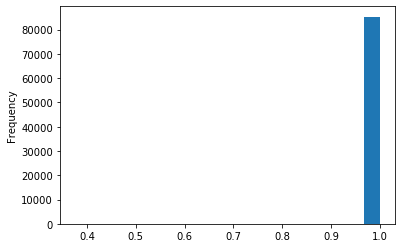

In [115]:
test_analysis[outlier_exclusion].plot.hist(bins=20)

In [116]:
np.quantile(test_analysis[outlier_exclusion], 0.001)

0.8948066666666666

In [117]:
test_analysis['thresh_pred'] = test_analysis[outlier_exclusion]  < .92
test_analysis['thresh_pred'] = test_analysis['thresh_pred'].astype(int)

In [118]:
confusion_matrix(test_analysis['org_class'], 
                            test_analysis['thresh_pred'])

array([[85268,    39],
       [   78,    58]])

In [121]:
print(classification_report(test_analysis['org_class'], 
                            test_analysis['thresh_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.60      0.43      0.50       136

    accuracy                           1.00     85443
   macro avg       0.80      0.71      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [122]:
confusion_matrix(test_analysis['org_class'], 
                            test_analysis['outlier_pred'])

array([[85227,    80],
       [   78,    58]])

In [123]:
print(classification_report(test_analysis['org_class'], 
                            test_analysis['outlier_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.42      0.43      0.42       136

    accuracy                           1.00     85443
   macro avg       0.71      0.71      0.71     85443
weighted avg       1.00      1.00      1.00     85443



In [196]:
test_analysis['thresh_pred'] = test_analysis[outlier_exclusion]  < .81
test_analysis['thresh_pred'] = test_analysis['thresh_pred'].astype(int)

print(classification_report(test_analysis['org_class'], 
                            test_analysis['thresh_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.37      0.48       136

    accuracy                           1.00     85443
   macro avg       0.85      0.68      0.74     85443
weighted avg       1.00      1.00      1.00     85443



In [197]:
confusion_matrix(test_analysis['org_class'], 
                            test_analysis['thresh_pred'])

array([[85286,    21],
       [   86,    50]])

In [198]:
test_analysis_trad['thresh_pred'] = test_analysis_trad[1] > 0.5
test_analysis_trad['thresh_pred'] = test_analysis_trad['thresh_pred'].astype(int)

print(classification_report(test_analysis_trad['class'], 
                            test_analysis_trad['thresh_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.32      0.44       136

    accuracy                           1.00     85443
   macro avg       0.85      0.66      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [192]:
confusion_matrix(test_analysis_trad['class'], 
                 test_analysis_trad['thresh_pred'])

array([[85288,    19],
       [   92,    44]])